# Loading and correcting data for RhFe 
# NanoLab experiments

In [1]:
%load_ext autoreload
%autoreload 2
%gui tk

In [2]:
#Imports
# Embedded imports
import os, sys
import copy
import math
import matplotlib.pyplot as plt
# Third party imports
import numpy as np
import pandas as pd
import scipy as sp
# Temporary solution for local imports
sys.path.append('..')
from xpstool import helpers 
from xpstool import Experiment, Spectrum, Region
from xpstool import Fitter

In [3]:
# ---SPECS DATA FOLDERS---
# Full path to data files
data_folder = "/Users/Shipilin/Documents/07_DataAnalysis/2018-RhFe_alloys/2018-November_Rh80Fe20/2018-11_Rh80Fe20_XPS/XY_RhFe"
data_subfolders = [
    "/Rh80Fe20(111)",
    "/Rh80Fe20(111)_7_11",
    "/Rh80Fe20(111)_8_11",
    "/Rh80Fe20(111)_9_11"
]
# Full path to output files
output_folder = "/Users/Shipilin/Documents/07_DataAnalysis/2018-RhFe_alloys/2018-November_Rh80Fe20/2018-11_Rh80Fe20_XPS/ProcessedData"

file_names = []
file_paths = []
file_idx = 0
for subfolder in data_subfolders:
    files = os.listdir("".join([data_folder, subfolder]))
    files = sorted(files, key=lambda x: int(x.rpartition('.')[0].rpartition('_')[2]))
    for file in files:
        if file.endswith(".xy"): 
            file_names.append(file)
            file_paths.append("/".join(["".join([data_folder, subfolder]), file]))
            #print(f"---> file[{file_idx}]: {file}")
            file_idx += 1

In [4]:
# Loading all spectra to a list
all_spectra = []
for path in file_paths:
    all_spectra.append(Spectrum(path=path, file_type="specs"))
       
print(f"{len(all_spectra)} spectra were loaded successfuly.")

# Check for spectra that are empty or contain more than one region
for spectrum in all_spectra:
    if spectrum.isEmpty():
        print(f"{spectrum.getID()} spectrum: 0 regions")
    if len(spectrum.getRegions()) > 1:
        print(f"{spectrum.getID()} spectrum: {len(spectrum.getRegions())} regions")

224 spectra were loaded successfuly.
Rh80Fe20(111)_3 spectrum: 0 regions
Rh80Fe20(111)_7_11_1 spectrum: 0 regions
Rh80Fe20(111)_7_11_2 spectrum: 0 regions
Rh80Fe20(111)_7_11_3 spectrum: 0 regions
Rh80Fe20(111)_7_11_60 spectrum: 0 regions
Rh80Fe20(111)_8_11_1 spectrum: 0 regions
Rh80Fe20(111)_8_11_2 spectrum: 0 regions
Rh80Fe20(111)_8_11_3 spectrum: 0 regions
Rh80Fe20(111)_9_11_1 spectrum: 0 regions
Rh80Fe20(111)_9_11_2 spectrum: 0 regions
Rh80Fe20(111)_9_11_3 spectrum: 0 regions
Rh80Fe20(111)_9_11_48 spectrum: 0 regions
Rh80Fe20(111)_9_11_49 spectrum: 0 regions
Rh80Fe20(111)_9_11_50 spectrum: 0 regions
Rh80Fe20(111)_9_11_51 spectrum: 0 regions
Rh80Fe20(111)_9_11_52 spectrum: 0 regions


### Normal Emission and Grazing (30 deg) Emission comparison  (clean surface)

In [5]:
# Complete list of files within the experimet
# All three lists below must have the same length
fermi_files = [
    "Rh80Fe20(111)_7_11_13", # 97K, NE
    "Rh80Fe20(111)_8_11_10", # 97K, GE
    "Rh80Fe20(111)_10", # RT, NE
    "Rh80Fe20(111)_25", # RT, GE
    "Rh80Fe20(111)_19", #300C, NE
    "Rh80Fe20(111)_31", #300C, GE
    "Rh80Fe20(111)_7_11_29", # 700C, NE
    "Rh80Fe20(111)_7_11_36" # 700C, GE
]
# Order: Survey, C1s, O1s, Fe2p, Rh3d
scan_sets = [
    [#"Rh80Fe20(111)_7_11_8", Surveys are commented 
     "Rh80Fe20(111)_7_11_11", 
     "Rh80Fe20(111)_7_11_12", 
     "Rh80Fe20(111)_7_11_9", 
     "Rh80Fe20(111)_7_11_10"],
    [#"Rh80Fe20(111)_8_11_4",
     "Rh80Fe20(111)_8_11_9", 
     "Rh80Fe20(111)_8_11_6", 
     "Rh80Fe20(111)_8_11_7", 
     "Rh80Fe20(111)_8_11_8"],
    [#"Rh80Fe20(111)_5",
     "Rh80Fe20(111)_8", 
     "Rh80Fe20(111)_9", 
     "Rh80Fe20(111)_6", 
     "Rh80Fe20(111)_7"],
    [#"Rh80Fe20(111)_20",
     "Rh80Fe20(111)_23", 
     "Rh80Fe20(111)_24", 
     "Rh80Fe20(111)_21", 
     "Rh80Fe20(111)_22"],
    [#"Rh80Fe20(111)_14",
     "Rh80Fe20(111)_17", 
     "Rh80Fe20(111)_18", 
     "Rh80Fe20(111)_15", 
     "Rh80Fe20(111)_16"],
    [#"Rh80Fe20(111)_26",
     "Rh80Fe20(111)_29", 
     "Rh80Fe20(111)_30", 
     "Rh80Fe20(111)_27", 
     "Rh80Fe20(111)_28"],
    [#"Rh80Fe20(111)_7_11_24",
     "Rh80Fe20(111)_7_11_27", 
     "Rh80Fe20(111)_7_11_28", 
     "Rh80Fe20(111)_7_11_25", 
     "Rh80Fe20(111)_7_11_26"],
    [#"Rh80Fe20(111)_7_11_31",
     "Rh80Fe20(111)_7_11_35", 
     "Rh80Fe20(111)_7_11_33", 
     "Rh80Fe20(111)_7_11_32", 
     "Rh80Fe20(111)_7_11_34"]
]
conditions = [
    {"Temperature": "97K", "Emission": "Normal"},
    {"Temperature": "97K", "Emission": "Grazing"},
    {"Temperature": "300K", "Emission": "Normal"},
    {"Temperature": "300K", "Emission": "Grazing"},
    {"Temperature": "575K", "Emission": "Normal"},
    {"Temperature": "575K", "Emission": "Grazing"},
    {"Temperature": "1000K", "Emission": "Normal"},
    {"Temperature": "1000K", "Emission": "Grazing"}
]
# Create an Experiment object to store spectra specified above
exp_GE_NE = Experiment()
# Uploading Fermi regions. Checking that the corresponding spectra 
# contain exactly one region and setting FermiFlags for this region.
for i, file in enumerate(fermi_files):
    file_with_ext = ".".join([file, "xy"])
    spectrum = Spectrum(path=file_paths[file_names.index(file_with_ext)], 
                        file_type="specs",
                        conditions=conditions[i])
    if spectrum.isEmpty():
        print(f"{spectrum.getID()} spectrum: 0 regions")
    else:
        if (len(spectrum.getRegions()) == 1):
            spectrum.getRegion().setFermiFlag()
        else:
            print(f"{spectrum.getID()} spectrum: {len(spectrum.getRegions())} regions")
        exp_GE_NE.addSpectrum(spectrum)

# Uploading other regions. Checking that the corresponding spectra 
# contain exactly one region.
for i, subset in enumerate(scan_sets):    
    for file in subset:
        file_with_ext = ".".join([file, "xy"])
        spectrum = Spectrum(path=file_paths[file_names.index(file_with_ext)], 
                            file_type="specs",
                            conditions=conditions[i])
        if spectrum.isEmpty():
            print(f"{spectrum.getID()} spectrum: 0 regions")
        else:
            exp_GE_NE.addSpectrum(spectrum)
            if len(spectrum.getRegions()) > 1:
                print(f"{spectrum.getID()} spectrum: {len(spectrum.getRegions())} regions")

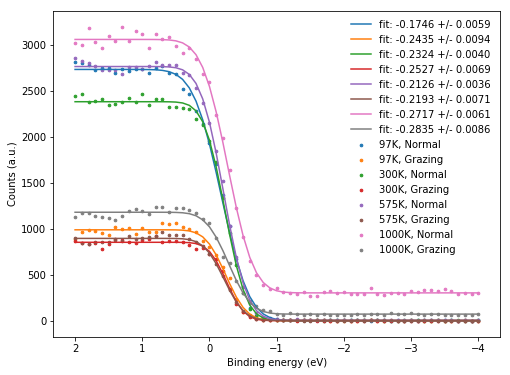

In [6]:
# Adjusting and plotting Fermi regions
shifts = [] # Contains energy shifts for every Fermi edge
gauss_fwhms = [] # Equipment gauss widening based on the Fermi edge
fig = plt.figure(1, figsize=(8,6))
for fermi in fermi_files:
    fermi_region = exp_GE_NE.getSpectrum(fermi).getRegion()
    fermi_region.invertToBinding()
    helpers.plotRegion(fermi_region, 
                       figure=fig.number, 
                       scatter=True,
                       label=f"{fermi_region.getConditions('Temperature')}, {fermi_region.getConditions('Emission')}",
                       title=False)

    fit_parameters = [1, -0.2, 0.2, 2000]
    #Fitting and adding a column with the fit function to the region object
    fit_res = helpers.fitFermiEdge(fermi_region, 
                                   fit_parameters, 
                                   add_column=True)
    shifts.append([fit_res[0][1], fit_res[1][1]])
    # a2 parameter of the complementary error function is related to the
    # sigma parameter of the gaussian that can be constructed to describe
    # the widening of ideal step function. 
    # FWHM_gauss = 2*sqrt(ln2)*a2
    # FWHM_gauss = 2*sqrt(2ln2)*sigma
    gauss_fwhms.append([2*(math.log(2))**(.5)*abs(fit_res[0][2]), fit_res[1][2]])
    helpers.plotRegion(fermi_region, 
                       figure=fig.number, 
                       y_data="fitFermi", 
                       label=f"fit: {fit_res[0][1]:.4f} +/- {fit_res[1][1]:.4f}", 
                       title=False)

Rh80Fe20(111)_7_11_11:C 1s (96K) - Background calculation failed due to excessive iterations
Rh80Fe20(111)_23:C 1s  after 2 cleaning cycles 60deg - Background calculation failed due to excessive iterations
Rh80Fe20(111)_7_11_27:C 1s (700C)) - Background calculation failed due to excessive iterations


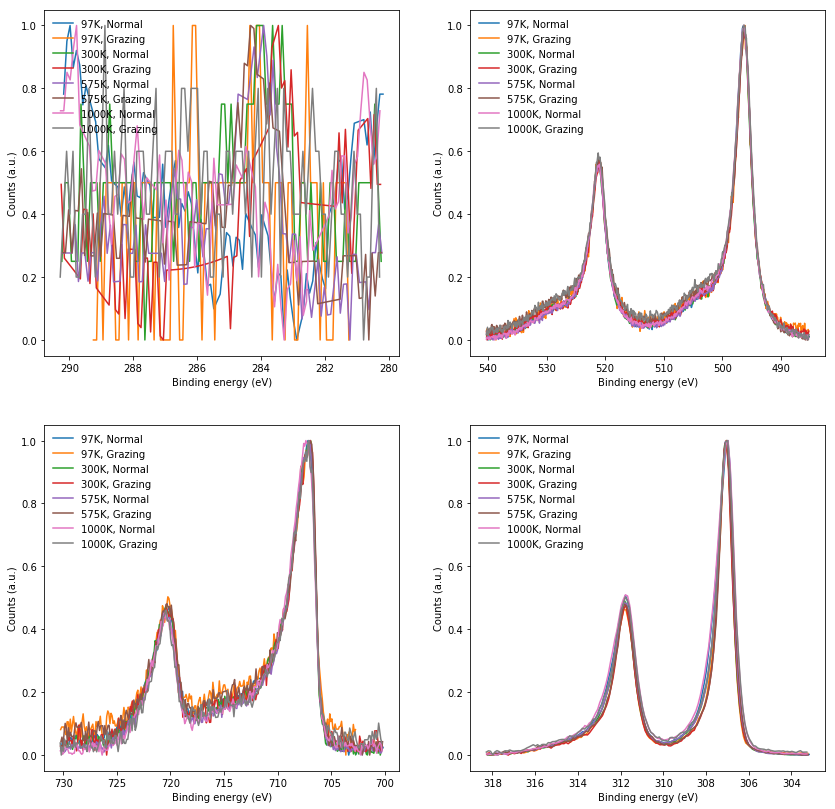

In [7]:
# Adjusting and plotting data overview
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(14,14))
ax = [ax1, ax2, ax3, ax4]
for i, single_set in enumerate(scan_sets): 
    for j, scan_file in enumerate(single_set):
        scan = exp_GE_NE.getSpectrum(scan_file).getRegion()
        if not scan.isEnergyCorrected():
            scan.correctEnergyShift(shifts[i][0])
        if not scan.isSweepsNormalized():
            scan.normalizeBySweeps()
        scan.invertToBinding()
        # Calculating backgrounds
        #helpers.smoothen(scan, y_data="counts", interval=3, add_column=True)
        helpers.calculateShirley(scan, y_data="counts", add_column=True)
        helpers.normalize(scan, y_data="shirleyBG", add_column=True)
        #helpers.calculateLinearBackground(scan, y_data="shirleyBG", add_column=True)
        scan.makeFinalColumn("normalized", overwrite=True)
        # Plotting spectra
        helpers.plotRegion(scan, 
                           figure=fig.number, 
                           ax=ax[j], 
                           y_data="final", 
                           label=f"{scan.getConditions('Temperature')}, {scan.getConditions('Emission')}", 
                           title=False)

### Beam damage

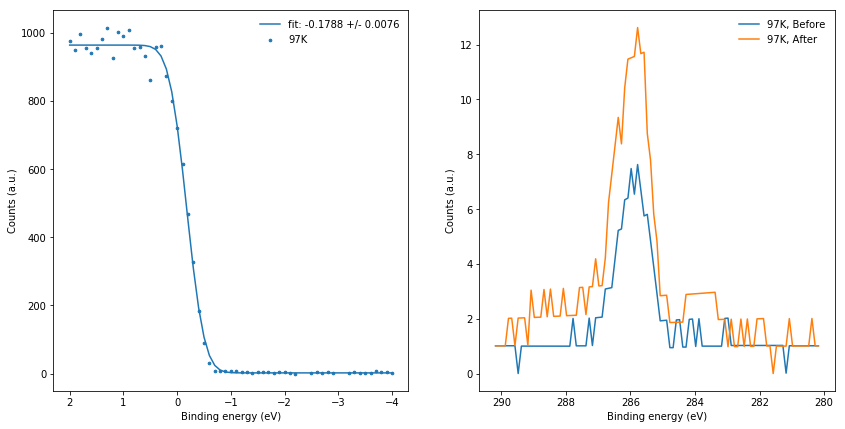

In [8]:
# Create an Experiment object to store spectra specified above
fermi_file = "Rh80Fe20(111)_7_11_44.xy"
before_file = "Rh80Fe20(111)_7_11_40.xy" # Before exposure, after dosing
after_file = "Rh80Fe20(111)_7_11_45.xy" # After exposure

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

# Adjusting and plotting Fermi region
shift = 0 # Contains energy shift for Fermi edge
gauss_fwhm = 0 # Equipment gauss widening based on the Fermi edge
fermi_sp = Spectrum(path=file_paths[file_names.index(fermi_file)], 
                        file_type="specs",
                        conditions={"Temperature":"97K"})
fermi_region = fermi_sp.getRegion()
fermi_region.setFermiFlag()
fermi_region.invertToBinding()
helpers.plotRegion(fermi_region, 
                   figure=fig.number,
                   ax=ax1,
                   scatter=True,
                   label=f"{fermi_region.getConditions('Temperature')}",
                   title=False)

fit_parameters = [1, -0.2, 0.2, 2000]
#Fitting and adding a column with the fit function to the region object
fit_res = helpers.fitFermiEdge(fermi_region, 
                               fit_parameters, 
                               add_column=True)
shift = [fit_res[0][1], fit_res[1][1]]
# a2 parameter of the complementary error function is related to the
# sigma parameter of the gaussian that can be constructed to describe
# the widening of ideal step function. 
# FWHM_gauss = 2*sqrt(ln2)*a2
# FWHM_gauss = 2*sqrt(2ln2)*sigma
gauss_fwhm = [2*(math.log(2))**(.5)*abs(fit_res[0][2]), fit_res[1][2]]
helpers.plotRegion(fermi_region, 
                   figure=fig.number,
                   ax=ax1,
                   y_data="fitFermi", 
                   label=f"fit: {fit_res[0][1]:.4f} +/- {fit_res[1][1]:.4f}", 
                   title=False)
for file in [before_file, after_file]:
    if file == before_file:
        conditions = "Before"
    else:
        conditions = "After"
    spectrum = Spectrum(path=file_paths[file_names.index(file)], 
                        file_type="specs",
                        conditions={"Temperature":"97K", "Beam Exposure": conditions})
    scan = spectrum.getRegion()
    scan.correctEnergyShift(shift[0])
    scan.normalizeBySweeps()
    scan.invertToBinding()
    # Calculating backgrounds
    helpers.calculateShirley(scan, y_data="counts", add_column=True)
    scan.makeFinalColumn("shirleyBG", overwrite=True)
    # Plotting spectra
    helpers.plotRegion(scan, 
                       figure=fig.number, 
                       ax=ax2, 
                       y_data="final", 
                       label=f"{scan.getConditions('Temperature')}, {scan.getConditions('Beam Exposure')}", 
                       title=False)

### Clean surface and CO adsorbate layers 10L and 50L at 97K

In [9]:
# Complete list of files within the experimet
# All three lists below must have the same length
fermi_files = [
    "Rh80Fe20(111)_9_11_10", # Clean
    "Rh80Fe20(111)_7_11_44", # 10L
    "Rh80Fe20(111)_8_11_33" # 50L
]
# Order: Survey, C1s, O1s, Fe2p, Rh3d
scan_sets = [
    [#"Rh80Fe20(111)_9_11_4", Surveys are commented 
     "Rh80Fe20(111)_9_11_9", 
     "Rh80Fe20(111)_9_11_6", 
     "Rh80Fe20(111)_9_11_7", 
     "Rh80Fe20(111)_9_11_8"],
    [#"Rh80Fe20(111)_7_11_39",
     "Rh80Fe20(111)_7_11_40", 
     "Rh80Fe20(111)_7_11_42", 
     "Rh80Fe20(111)_7_11_41", 
     "Rh80Fe20(111)_7_11_43"],
    [#"Rh80Fe20(111)_8_11_27",
     "Rh80Fe20(111)_8_11_28", 
     "Rh80Fe20(111)_8_11_30", 
     "Rh80Fe20(111)_8_11_31", 
     "Rh80Fe20(111)_8_11_32"]
]
conditions = [
    {"Temperature": "97K", "Surface Coverage": "None"},
    {"Temperature": "97K", "Surface Coverage": "10L"},
    {"Temperature": "97K", "Surface Coverage": "50L"}
]
# Create an Experiment object to store spectra specified above
exp_coverage = Experiment()
# Uploading Fermi regions. Checking that the corresponding spectra 
# contain exactly one region and setting FermiFlags for this region.
for i, file in enumerate(fermi_files):
    file_with_ext = ".".join([file, "xy"])
    spectrum = Spectrum(path=file_paths[file_names.index(file_with_ext)], 
                        file_type="specs",
                        conditions=conditions[i])
    if spectrum.isEmpty():
        print(f"{spectrum.getID()} spectrum: 0 regions")
    else:
        if (len(spectrum.getRegions()) == 1):
            spectrum.getRegion().setFermiFlag()
        else:
            print(f"{spectrum.getID()} spectrum: {len(spectrum.getRegions())} regions")
        exp_coverage.addSpectrum(spectrum)

# Uploading other regions. Checking that the corresponding spectra 
# contain exactly one region.
for i, subset in enumerate(scan_sets):    
    for file in subset:
        file_with_ext = ".".join([file, "xy"])
        spectrum = Spectrum(path=file_paths[file_names.index(file_with_ext)], 
                            file_type="specs",
                            conditions=conditions[i])
        if spectrum.isEmpty():
            print(f"{spectrum.getID()} spectrum: 0 regions")
        else:
            exp_coverage.addSpectrum(spectrum)
            if len(spectrum.getRegions()) > 1:
                print(f"{spectrum.getID()} spectrum: {len(spectrum.getRegions())} regions")

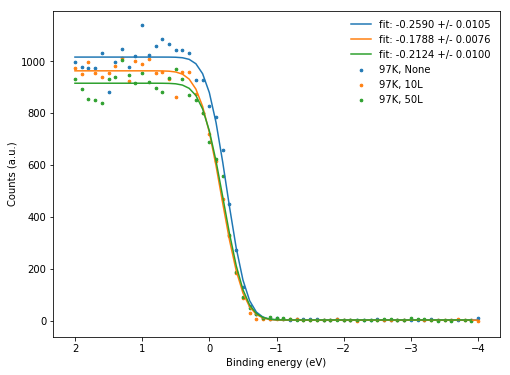

In [10]:
# Adjusting and plotting Fermi regions
shifts = [] # Contains energy shifts for every Fermi edge
gauss_fwhms = [] # Equipment gauss widening based on the Fermi edge
fig = plt.figure(1, figsize=(8,6))
for fermi in fermi_files:
    fermi_region = exp_coverage.getSpectrum(fermi).getRegion()
    fermi_region.invertToBinding()
    helpers.plotRegion(fermi_region, 
                       figure=fig.number, 
                       scatter=True,
                       label=f"{fermi_region.getConditions('Temperature')}, {fermi_region.getConditions('Surface Coverage')}",
                       title=False)

    fit_parameters = [1, -0.2, 0.2, 2000]
    #Fitting and adding a column with the fit function to the region object
    fit_res = helpers.fitFermiEdge(fermi_region, 
                                   fit_parameters, 
                                   add_column=True)
    shifts.append([fit_res[0][1], fit_res[1][1]])
    # a2 parameter of the complementary error function is related to the
    # sigma parameter of the gaussian that can be constructed to describe
    # the widening of ideal step function. 
    # FWHM_gauss = 2*sqrt(ln2)*a2
    # FWHM_gauss = 2*sqrt(2ln2)*sigma
    gauss_fwhms.append([2*(math.log(2))**(.5)*abs(fit_res[0][2]), fit_res[1][2]])
    helpers.plotRegion(fermi_region, 
                       figure=fig.number, 
                       y_data="fitFermi", 
                       label=f"fit: {fit_res[0][1]:.4f} +/- {fit_res[1][1]:.4f}", 
                       title=False)

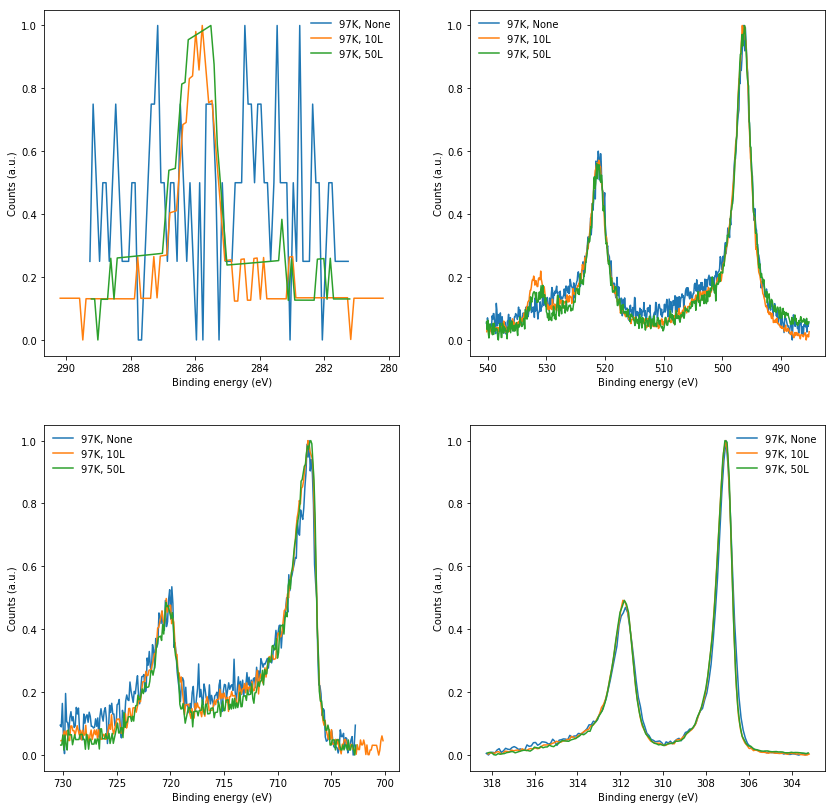

In [11]:
# Adjusting and plotting data overview
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(14,14))
ax = [ax1, ax2, ax3, ax4]
for i, single_set in enumerate(scan_sets): 
    for j, scan_file in enumerate(single_set):
        scan = exp_coverage.getSpectrum(scan_file).getRegion()
        if not scan.isEnergyCorrected():
            scan.correctEnergyShift(shifts[i][0])
        if not scan.isSweepsNormalized():
            scan.normalizeBySweeps()
        scan.invertToBinding()
        # Calculating backgrounds
        #helpers.smoothen(scan, y_data="counts", interval=3, add_column=True)
        helpers.calculateShirley(scan, y_data="counts", add_column=True)
        helpers.normalize(scan, y_data="shirleyBG", add_column=True)
        if j == 0:
            helpers.calculateLinearBackground(scan, 
                                              y_data="normalized", 
                                              manual_bg=[[290,285],[282,280]],
                                              add_column=True)        
        if j == 1:
            helpers.calculateLinearBackground(scan, 
                                              y_data="normalized", 
                                              manual_bg=[[540,537],[488,485]],
                                              add_column=True)
        if j == 2:
            helpers.calculateLinearBackground(scan, 
                                              y_data="normalized", 
                                              manual_bg=[[730,726],[704,700]],
                                              add_column=True)
        if j == 3:
            helpers.calculateLinearBackground(scan, 
                                              y_data="normalized", 
                                              manual_bg=[[318,317],[304,303]],
                                              add_column=True)
        scan.makeFinalColumn("linearBG", overwrite=True)
        # Plotting spectra
        helpers.plotRegion(scan, 
                           figure=fig.number, 
                           ax=ax[j], 
                           y_data="final", 
                           label=f"{scan.getConditions('Temperature')}, {scan.getConditions('Surface Coverage')}", 
                           title=False)

### CO desorption experiment (after dosing 50L): 97K --> 260K <br>
NOTE: According to the pirometer 260K on th esample stage corresponds to about 180-200 C on the surface

In [21]:
# Complete list of files within the experimet
# All three lists below must have the same length
fermi_files = [
    "Rh80Fe20(111)_9_11_13", # 97K
    "Rh80Fe20(111)_8_11_48", # 110K # NOTE: The Fermi was not taken. Borrowed from the next measurement.
    "Rh80Fe20(111)_8_11_48", # 120K
    "Rh80Fe20(111)_8_11_54", # 130K
    "Rh80Fe20(111)_8_11_60", # 140K
    "Rh80Fe20(111)_9_11_16", # 150K
    #"Rh80Fe20(111)_9_11_19", # 170K
    "Rh80Fe20(111)_9_11_22", # 180K
    "Rh80Fe20(111)_9_11_25", # 190K
    "Rh80Fe20(111)_9_11_28", # 200K
    "Rh80Fe20(111)_9_11_31", # 210K
    "Rh80Fe20(111)_9_11_34", # 220K
    "Rh80Fe20(111)_9_11_37", # 230K
    "Rh80Fe20(111)_9_11_40", # 240K
    "Rh80Fe20(111)_9_11_43", # 250K
    "Rh80Fe20(111)_9_11_46" # 260K
]
# Order: C1s, O1s
scan_sets = [
    ["Rh80Fe20(111)_9_11_11", 
     "Rh80Fe20(111)_9_11_12"],
    ["Rh80Fe20(111)_8_11_42", 
     "Rh80Fe20(111)_8_11_43"],
    ["Rh80Fe20(111)_8_11_46", 
     "Rh80Fe20(111)_8_11_47"],
    ["Rh80Fe20(111)_8_11_52", 
     "Rh80Fe20(111)_8_11_53"],
    ["Rh80Fe20(111)_8_11_58", 
     "Rh80Fe20(111)_8_11_59"],
    ["Rh80Fe20(111)_9_11_14", 
     "Rh80Fe20(111)_9_11_15"],
   # ["Rh80Fe20(111)_9_11_17", 
   #  "Rh80Fe20(111)_9_11_18"],
    ["Rh80Fe20(111)_9_11_20", 
     "Rh80Fe20(111)_9_11_21"],
    ["Rh80Fe20(111)_9_11_23", 
     "Rh80Fe20(111)_9_11_24"],
    ["Rh80Fe20(111)_9_11_26", 
     "Rh80Fe20(111)_9_11_27"],
    ["Rh80Fe20(111)_9_11_29", 
     "Rh80Fe20(111)_9_11_30"],
    ["Rh80Fe20(111)_9_11_32", 
     "Rh80Fe20(111)_9_11_33"],
    ["Rh80Fe20(111)_9_11_35", 
     "Rh80Fe20(111)_9_11_36"],
    ["Rh80Fe20(111)_9_11_38", 
     "Rh80Fe20(111)_9_11_39"],
    ["Rh80Fe20(111)_9_11_41", 
     "Rh80Fe20(111)_9_11_42"],
    ["Rh80Fe20(111)_9_11_44", 
     "Rh80Fe20(111)_9_11_45"]
]
conditions = [
    {"Temperature": "97K"},
    {"Temperature": "110K"},
    {"Temperature": "120K"},
    {"Temperature": "130K"},
    {"Temperature": "140K"},
    {"Temperature": "150K"},
    #{"Temperature": "170K"},
    {"Temperature": "180K"},
    {"Temperature": "190K"},
    {"Temperature": "200K"},
    {"Temperature": "210K"},
    {"Temperature": "220K"},
    {"Temperature": "230K"},
    {"Temperature": "240K"},
    {"Temperature": "250K"},
    {"Temperature": "260K"}
]
# Create an Experiment object to store spectra specified above
exp_desorption = Experiment()
# Uploading Fermi regions. Checking that the corresponding spectra 
# contain exactly one region and setting FermiFlags for this region.
for i, file in enumerate(fermi_files):
    file_with_ext = ".".join([file, "xy"])
    spectrum = Spectrum(path=file_paths[file_names.index(file_with_ext)], 
                        file_type="specs",
                        conditions=conditions[i])
    if spectrum.isEmpty():
        print(f"{spectrum.getID()} spectrum: 0 regions")
    else:
        if (len(spectrum.getRegions()) == 1):
            spectrum.getRegion().setFermiFlag()
        else:
            print(f"{spectrum.getID()} spectrum: {len(spectrum.getRegions())} regions")
        exp_desorption.addSpectrum(spectrum)

# Uploading other regions. Checking that the corresponding spectra 
# contain exactly one region.
for i, subset in enumerate(scan_sets):    
    for file in subset:
        file_with_ext = ".".join([file, "xy"])
        spectrum = Spectrum(path=file_paths[file_names.index(file_with_ext)], 
                            file_type="specs",
                            conditions=conditions[i])
        if spectrum.isEmpty():
            print(f"{spectrum.getID()} spectrum: 0 regions")
        else:
            exp_desorption.addSpectrum(spectrum)
            if len(spectrum.getRegions()) > 1:
                print(f"{spectrum.getID()} spectrum: {len(spectrum.getRegions())} regions")

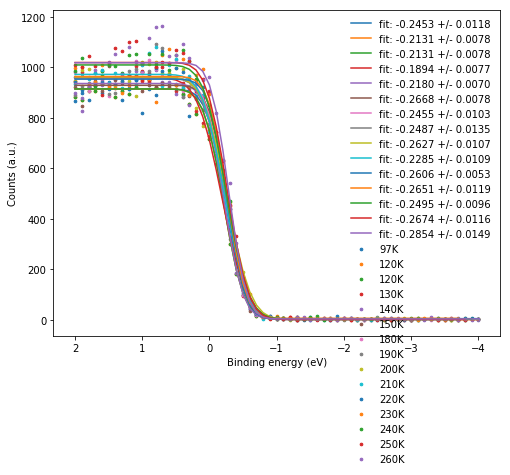

In [22]:
# Adjusting and plotting Fermi regions
shifts = [] # Contains energy shifts for every Fermi edge
gauss_fwhms = [] # Equipment gauss widening based on the Fermi edge
fig = plt.figure(1, figsize=(8,6))
for fermi in fermi_files:
    fermi_region = exp_desorption.getSpectrum(fermi).getRegion()
    fermi_region.invertToBinding()
    helpers.plotRegion(fermi_region, 
                       figure=fig.number, 
                       scatter=True,
                       label=f"{fermi_region.getConditions('Temperature')}",
                       title=False)

    fit_parameters = [1, -0.2, 0.2, 2000]
    #Fitting and adding a column with the fit function to the region object
    fit_res = helpers.fitFermiEdge(fermi_region, 
                                   fit_parameters, 
                                   add_column=True)
    shifts.append([fit_res[0][1], fit_res[1][1]])
    # a2 parameter of the complementary error function is related to the
    # sigma parameter of the gaussian that can be constructed to describe
    # the widening of ideal step function. 
    # FWHM_gauss = 2*sqrt(ln2)*a2
    # FWHM_gauss = 2*sqrt(2ln2)*sigma
    gauss_fwhms.append([2*(math.log(2))**(.5)*abs(fit_res[0][2]), fit_res[1][2]])
    helpers.plotRegion(fermi_region, 
                       figure=fig.number, 
                       y_data="fitFermi", 
                       label=f"fit: {fit_res[0][1]:.4f} +/- {fit_res[1][1]:.4f}", 
                       title=False)

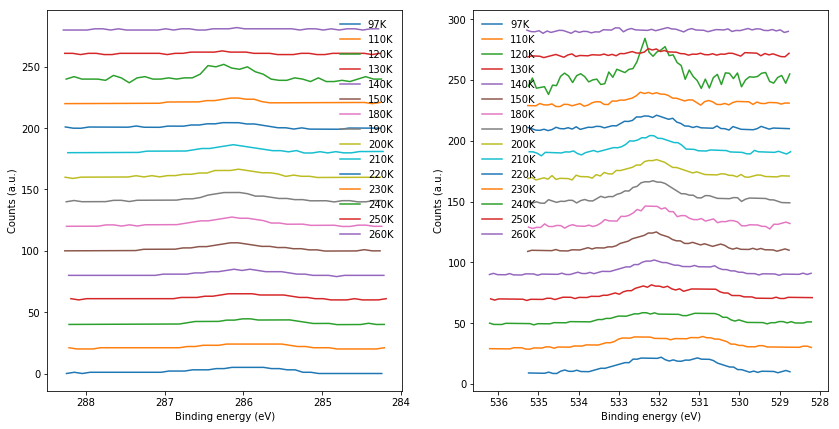

In [31]:
# Adjusting and plotting data overview
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
ax = [ax1, ax2]
for i, single_set in enumerate(scan_sets): 
    for j, scan_file in enumerate(single_set):
        scan = exp_desorption.getSpectrum(scan_file).getRegion()
        if not scan.isEnergyCorrected():
            scan.correctEnergyShift(shifts[i][0])
        if not scan.isSweepsNormalized():
            scan.normalizeBySweeps()
        scan.invertToBinding()
        # Calculating backgrounds
        #helpers.smoothen(scan, y_data="counts", interval=3, add_column=True)
#         helpers.calculateShirley(scan, y_data="counts", add_column=True)
        if j == 0:
            helpers.calculateLinearBackground(scan, 
                                              y_data="counts", 
                                              manual_bg=[[288.5,287.4],[284.7,284]],
                                              add_column=True)        
        if j == 1:
            helpers.calculateLinearBackground(scan, 
                                              y_data="counts", 
                                              manual_bg=[[536,534],[529.5,528]],
                                              add_column=True)
        helpers.normalize(scan, y_data="linearBG", add_column=True)
        #helpers.calculateLinearBackground(scan, y_data="shirleyBG", add_column=True)
        scan.makeFinalColumn("linearBG", overwrite=True)
        # Plotting spectra
        helpers.plotRegion(scan, 
                           figure=fig.number, 
                           ax=ax[j], 
                           y_offset=10*(2*i+j),
                           log_scale=False,
                           y_data="final", 
                           label=f"{scan.getConditions('Temperature')}", 
                           title=False)

### Experiment's log 
**Folder Rh80Fe20(111)**<br>
The sample was heated to about 900 K in vacuum during one hour time.
-  all_spectra[3] ---> Rh80Fe20(111)_4:survey

Two cycles of sputtering (1 kV, 5E-6 mbar Ar, 6 mA emission, 20 minutes) <br> 
and annealing (600V, 2.2A, 78-60mA, 5minutes. ~ 900K) <br>
***
Data Set #1: Clean surface, Normal emission, Room temperature
-  all_spectra[4] ---> Rh80Fe20(111)_5:survey
-  all_spectra[5] ---> Rh80Fe20(111)_6:Fe2p NE
-  all_spectra[6] ---> Rh80Fe20(111)_7:Rh3d NE
-  all_spectra[7] ---> Rh80Fe20(111)_8:C1s NE
-  all_spectra[8] ---> Rh80Fe20(111)_9:O1s(+Rh3p) NE
-  all_spectra[9] ---> Rh80Fe20(111)_10:Ef NE
-  all_spectra[10] ---> Rh80Fe20(111)_11:Survey (Spot #2) NE
***
#### NOTE: Analyser window was closed until now. Following scans have higher intensity due to open window
Checking for the surface homogenity:
-  all_spectra[11] ---> Rh80Fe20(111)_12:Survey (Spot #1) NE
-  all_spectra[12] ---> Rh80Fe20(111)_13:Survey (Spot #3) NE

All surveys look pretty much the same, so, thesample surface seems to be homogeneous <br>
***
Data Set #2: Clean surface, Normal Emission, 300C
-  all_spectra[13] ---> Rh80Fe20(111)_14:Survey 300C NE
-  all_spectra[14] ---> Rh80Fe20(111)_15:Fe2p 300C NE
-  all_spectra[15] ---> Rh80Fe20(111)_16:Rh3d 300C NE
-  all_spectra[16] ---> Rh80Fe20(111)_17:C1s 300C NE
-  all_spectra[17] ---> Rh80Fe20(111)_18:O1s(+Rh3p) 300C NE
-  all_spectra[18] ---> Rh80Fe20(111)_19:Ef 300C NE
***
Data Set #3: Clean surface, Grazing Emission, Room temperature
-  all_spectra[19] ---> Rh80Fe20(111)_20:Survey GE
-  all_spectra[20] ---> Rh80Fe20(111)_21:Fe2p GE
-  all_spectra[21] ---> Rh80Fe20(111)_22:Rh3d GE
-  all_spectra[22] ---> Rh80Fe20(111)_23:C1s GE
-  all_spectra[23] ---> Rh80Fe20(111)_24:O1s(+Rh3p) GE
-  all_spectra[24] ---> Rh80Fe20(111)_25:Ef GE
***
Data Set #4: Clean surface, Grazing Emission, 300C
-  all_spectra[25] ---> Rh80Fe20(111)_26:Survey 300C GE
-  all_spectra[26] ---> Rh80Fe20(111)_27:Fe2p 300C GE
-  all_spectra[27] ---> Rh80Fe20(111)_28:Rh3d 300C GE
-  all_spectra[28] ---> Rh80Fe20(111)_29:C1s 300C GE
-  all_spectra[29] ---> Rh80Fe20(111)_30:O1s(+Rh3p) 300C GE
-  all_spectra[30] ---> Rh80Fe20(111)_31:Ef 300C GE
***
**Folder Rh80Fe20(111)\_7\_11**<br>
Two cycles of sputtering (1 kV, 5E-6 mbar Ar, 6 mA emission, 20 minutes) <br> 
and annealing (600V, 2.2A, 78-60mA, 5minutes. ~ 900K) <br>
Cooling down to Liquid Nitrogen temperature. <br>
<br>
Taking spectra upon cooling to check water formation and such:
-  all_spectra[34] ---> Rh80Fe20(111)\_7\_11\_4:Survey NE (cooling start from 650K)
-  all_spectra[35] ---> Rh80Fe20(111)\_7\_11\_5:O1s(+Rh3p) NE (cooling start from 650K)
-  all_spectra[36] ---> Rh80Fe20(111)\_7\_11\_6:Fe2p NE (cooling start from 650K)
-  all_spectra[37] ---> Rh80Fe20(111)\_7\_11\_7:Ef NE (cooling start from 650K)
***
Data Set #5: Clean surface, Normal Emission, 96K (Liquid Nitrogen)
-  all_spectra[38] ---> Rh80Fe20(111)\_7\_11\_8:Survey 96K NE 
-  all_spectra[39] ---> Rh80Fe20(111)\_7\_11\_9:Fe2p 96K NE 
-  all_spectra[40] ---> Rh80Fe20(111)\_7\_11\_10:Rh3d 96K NE 
-  all_spectra[41] ---> Rh80Fe20(111)\_7\_11\_11:C1s 96K NE 
-  all_spectra[42] ---> Rh80Fe20(111)\_7\_11\_12:O1s(+Rh3p) 96K NE 
-  all_spectra[43] ---> Rh80Fe20(111)\_7\_11\_13:Ef 96K NE 
***
Checking for water
-  all_spectra[44] ---> Rh80Fe20(111)\_7\_11\_14:O1s(+Rh3p) 96K NE
***
Data Set #6: Clean surface, Grazing Emission, 96K (Liquid Nitrogen)
-  all_spectra[45] ---> Rh80Fe20(111)\_7\_11\_15:Survey 96K GE 
-  all_spectra[46] ---> Rh80Fe20(111)\_7\_11\_16:Fe2p 96K GE 
-  all_spectra[47] ---> Rh80Fe20(111)\_7\_11\_17:Rh3d 96K GE 
-  all_spectra[48] ---> Rh80Fe20(111)\_7\_11\_18:C1s 96K GE 
-  all_spectra[49] ---> Rh80Fe20(111)\_7\_11\_19:O1s(+Rh3p) 96K GE <font color=red>(NOTE: Prominent feature)</font>
-  all_spectra[50] ---> Rh80Fe20(111)\_7\_11\_20:Ef 96K GE 

Reoptimized position:
-  all_spectra[51] ---> Rh80Fe20(111)\_7\_11\_21:Survey 96K GE
-  all_spectra[52] ---> Rh80Fe20(111)\_7\_11\_22:O1s(+Rh3p) 96K GE 
-  all_spectra[53] ---> Rh80Fe20(111)\_7\_11\_23:Ef 96K GE
***
Data Set #7: Clean surface, Normal Emission, 700C
-  all_spectra[54] ---> Rh80Fe20(111)\_7\_11\_24:Survey 700C NE 
-  all_spectra[55] ---> Rh80Fe20(111)\_7\_11\_25:Fe2p 700C NE 
-  all_spectra[56] ---> Rh80Fe20(111)\_7\_11\_26:Rh3d 700C NE 
-  all_spectra[57] ---> Rh80Fe20(111)\_7\_11\_27:C1s 700C NE 
-  all_spectra[58] ---> Rh80Fe20(111)\_7\_11\_28:O1s(+Rh3p) 700C NE 
-  all_spectra[59] ---> Rh80Fe20(111)\_7\_11\_29:Ef 700C NE 
***
In Grazing Emission position at elevated pressures high binding energy tail of survey scans is elevated by some background contribution.
-  all_spectra[60] ---> Rh80Fe20(111)\_7\_11\_30:Survey 700C NE 
-  all_spectra[61] ---> Rh80Fe20(111)\_7\_11\_31:Survey 700C GE 
Additionally, in Grazing Emission there is a big peak around 890 eV binding energy, which disappears when the e-beam heater is off. Some weird behavior, but not related to surface contaminations.
-  all_spectra[67] ---> Rh80Fe20(111)\_7\_11\_37:Survey around 890 eV 700C GE (Heater ON) 
-  all_spectra[68] ---> Rh80Fe20(111)\_7\_11\_38:Survey around 890 eV 700C GE  (Heater OFF)
***
Data Set #8: Clean surface, Grazing Emission, 700C
-  all_spectra[61] ---> Rh80Fe20(111)\_7\_11\_31:Survey 700C GE 
-  all_spectra[62] ---> Rh80Fe20(111)\_7\_11\_32:Fe2p 700C GE 
-  all_spectra[63] ---> Rh80Fe20(111)\_7\_11\_33:O1s(+Rh3p) 700C GE 
-  all_spectra[64] ---> Rh80Fe20(111)\_7\_11\_34:Rh3d 700C GE 
-  all_spectra[65] ---> Rh80Fe20(111)\_7\_11\_35:C1s 700C GE 
-  all_spectra[66] ---> Rh80Fe20(111)\_7\_11\_36:Ef 700C GE 
***
Cool the sample down and dose 10L CO (2E-7 mbar CO for 1 min).
***
Data Set #9: 10L CO at 97K, Grazing Emission
-  all_spectra[69] ---> Rh80Fe20(111)\_7\_11\_39:Survey 97K CO:10L GE 
-  all_spectra[70] ---> Rh80Fe20(111)\_7\_11\_40:C1s 97K CO:10L GE
-  all_spectra[71] ---> Rh80Fe20(111)\_7\_11\_41:Fe2p 97K CO:10L GE 
-  all_spectra[72] ---> Rh80Fe20(111)\_7\_11\_42:O1s(+Rh3p) 97K CO:10L GE
-  all_spectra[73] ---> Rh80Fe20(111)\_7\_11\_43:Rh3d CO:10L 97K GE
-  all_spectra[74] ---> Rh80Fe20(111)\_7\_11\_44:Ef 97K CO:10L GE

Checking the beamdamage:
-  all_spectra[70] ---> Rh80Fe20(111)\_7\_11\_40:C1s 97K CO:10L GE (before set) 
-  all_spectra[75] ---> Rh80Fe20(111)\_7\_11\_45:C1s 97K CO:10L GE (after set)
***
<font color=red>Add-dimension scan upon heating following CO desorption</font>
-  all_spectra[76] ---> Rh80Fe20(111)\_7\_11\_46:C1s 97K CO:10L GE
***
Data Set #10: Surface after CO desorption, 230C, Grazing Emission
-  all_spectra[78] ---> Rh80Fe20(111)\_7\_11\_39:Survey 230C GE 
-  all_spectra[79] ---> Rh80Fe20(111)\_7\_11\_49:C1s 230C GE
-  all_spectra[80] ---> Rh80Fe20(111)\_7\_11\_50:Fe2p 230C GE 
-  all_spectra[81] ---> Rh80Fe20(111)\_7\_11\_51:O1s(+Rh3p) 230C GE
-  all_spectra[82] ---> Rh80Fe20(111)\_7\_11\_52:Rh3d 230C GE
-  all_spectra[83] ---> Rh80Fe20(111)\_7\_11\_53:Ef 230C GE
***
***
Cool the sample down and dose 10L CO2 (2E-7 mbar CO2 for 1 min).
***
Data Set #11: 10L CO2 at 97K, Grazing Emission
-  all_spectra[84] ---> Rh80Fe20(111)\_7\_11\_54:Survey 97K CO2:10L GE 
-  all_spectra[85] ---> Rh80Fe20(111)\_7\_11\_55:C1s 97K CO2:10L GE
-  all_spectra[86] ---> Rh80Fe20(111)\_7\_11\_56:Fe2p 97K CO2:10L GE 
-  all_spectra[87] ---> Rh80Fe20(111)\_7\_11\_57:O1s(+Rh3p) 97K CO2:10L GE
-  all_spectra[88] ---> Rh80Fe20(111)\_7\_11\_58:Rh3d CO2:10L 97K GE
-  all_spectra[89] ---> Rh80Fe20(111)\_7\_11\_59:Ef 97K CO2:10L GE
***
**Folder Rh80Fe20(111)\_8\_11**<br>
Sputtering (1 kV, 5E-6 mbar Ar, 6 mA emission, 20 minutes) while cooling the sample down<br> 
Flash to 700C <br>
Cool down to Liquid Nitrogen temperature. <br>
Added a short scan of O1s region without Rh3p
***
Data Set #12: Clean surface at 97K, Grazing Emission
-  all_spectra[94] ---> Rh80Fe20(111)\_8\_11\_4:Survey 97K GE 
-  all_spectra[95] ---> Rh80Fe20(111)\_8\_11\_5:O1s 97K GE
-  all_spectra[96] ---> Rh80Fe20(111)\_8\_11\_6:O1s(+Rh3p) 97K GE
-  all_spectra[97] ---> Rh80Fe20(111)\_8\_11\_7:Fe2p 97K GE 
-  all_spectra[98] ---> Rh80Fe20(111)\_8\_11\_8:Rh3d 97K GE
-  all_spectra[99] ---> Rh80Fe20(111)\_8\_11\_9:C1s 97K GE
-  all_spectra[100] ---> Rh80Fe20(111)\_8\_11\_10:Ef 97K GE
***
Dosing CO 50L at 97K (5 min at 2E-7 mbar CO)
Taking few scans of C1s region along with the dosing
-  all_spectra[101] - all_spectra[116] <br>
    ---> Rh80Fe20(111)\_8\_11\_11 - Rh80Fe20(111)\_8\_11\_26:C1s 97K GE <br>
NOTE: Spectra [115] - [116] have 10 sweeps each, while other only 2 <br>
NOTE: Pass energy for spectra [101] - [116] was changed to 40 eV
***
Data Set #13: 50L CO at 97K, Grazing Emission
-  all_spectra[117] ---> Rh80Fe20(111)\_8\_11\_27:Survey 97K CO:50L GE 
-  all_spectra[118] ---> Rh80Fe20(111)\_8\_11\_28:C1s 97K CO:50L GE
<font color=red>Good for comparison:</font>
-  all_spectra[119] ---> Rh80Fe20(111)\_8\_11\_29:O1s 97K CO:50L GE
-  all_spectra[120] ---> Rh80Fe20(111)\_8\_11\_30:O1s(+Rh3p) 97K CO:50L GE
-  all_spectra[121] ---> Rh80Fe20(111)\_8\_11\_31:Fe3p CO:50L 97K GE
-  all_spectra[122] ---> Rh80Fe20(111)\_8\_11\_32:Rh3d 97K CO:50L GE
-  all_spectra[123] ---> Rh80Fe20(111)\_8\_11\_33:Ef 97K CO:50L GE
***
Taking several C1s and O1s spectra before starting to heat
-  all_spectra[124] ---> Rh80Fe20(111)\_8\_11\_34:C1s 97K CO:50L GE
-  all_spectra[125] ---> Rh80Fe20(111)\_8\_11\_35:O1s 97K CO:50L GE
-  all_spectra[126] ---> Rh80Fe20(111)\_8\_11\_36:C1s 97K CO:50L GE
-  all_spectra[127] ---> Rh80Fe20(111)\_8\_11\_37:O1s 97K CO:50L GE
-  all_spectra[128] ---> Rh80Fe20(111)\_8\_11\_38:C1s 97K CO:50L GE
-  all_spectra[129] ---> Rh80Fe20(111)\_8\_11\_39:O1s 97K CO:50L GE
-  all_spectra[130] ---> Rh80Fe20(111)\_8\_11\_40:C1s 97K CO:50L GE
-  all_spectra[131] ---> Rh80Fe20(111)\_8\_11\_41:O1s 97K CO:50L GE
***
Start heating <br>
Data Set #14: 50L CO desorption from 97 to 180K, Grazing Emission

<font color=red>110K</font>
-  all_spectra[132] ---> Rh80Fe20(111)\_8\_11\_42:C1s 110K CO:50L GE
-  all_spectra[133] ---> Rh80Fe20(111)\_8\_11\_43:O1s 110K CO:50L GE

<font color=red>115K</font>
-  all_spectra[134] ---> Rh80Fe20(111)\_8\_11\_44:C1s 115K CO:50L GE
-  all_spectra[135] ---> Rh80Fe20(111)\_8\_11\_45:O1s 115K CO:50L GE

<font color=red>120K</font>
-  all_spectra[136] ---> Rh80Fe20(111)\_8\_11\_46:C1s 120K CO:50L GE
-  all_spectra[137] ---> Rh80Fe20(111)\_8\_11\_47:O1s 120K CO:50L GE
-  all_spectra[138] ---> Rh80Fe20(111)\_8\_11\_48:Ef 120K CO:50L GE

<font color=red>125K</font>
-  all_spectra[139] ---> Rh80Fe20(111)\_8\_11\_49:C1s 125K CO:50L GE
-  all_spectra[140] ---> Rh80Fe20(111)\_8\_11\_50:O1s 125K CO:50L GE
-  all_spectra[141] ---> Rh80Fe20(111)\_8\_11\_51:Ef 125K CO:50L GE

<font color=red>130K</font>
-  all_spectra[142] ---> Rh80Fe20(111)\_8\_11\_52:C1s 130K CO:50L GE
-  all_spectra[143] ---> Rh80Fe20(111)\_8\_11\_53:O1s 130K CO:50L GE
-  all_spectra[144] ---> Rh80Fe20(111)\_8\_11\_54:Ef 130K CO:50L GE

<font color=red>135K</font>
-  all_spectra[145] ---> Rh80Fe20(111)\_8\_11\_55:C1s 135K CO:50L GE
-  all_spectra[146] ---> Rh80Fe20(111)\_8\_11\_56:O1s 135K CO:50L GE
-  all_spectra[147] ---> Rh80Fe20(111)\_8\_11\_57:Ef 135K CO:50L GE

<font color=red>140K</font>
-  all_spectra[148] ---> Rh80Fe20(111)\_8\_11\_58:C1s 140K CO:50L GE
-  all_spectra[149] ---> Rh80Fe20(111)\_8\_11\_59:O1s 140K CO:50L GE
-  all_spectra[150] ---> Rh80Fe20(111)\_8\_11\_60:Ef 140K CO:50L GE

<font color=red>145K</font>
-  all_spectra[151] ---> Rh80Fe20(111)\_8\_11\_61:C1s 145K CO:50L GE
-  all_spectra[152] ---> Rh80Fe20(111)\_8\_11\_62:O1s 145K CO:50L GE
-  all_spectra[153] ---> Rh80Fe20(111)\_8\_11\_63:Ef 145K CO:50L GE

<font color=red>150K</font>
-  all_spectra[154] ---> Rh80Fe20(111)\_8\_11\_64:C1s 150K CO:50L GE
-  all_spectra[155] ---> Rh80Fe20(111)\_8\_11\_65:O1s 150K CO:50L GE
-  all_spectra[156] ---> Rh80Fe20(111)\_8\_11\_66:Ef 150K CO:50L GE

<font color=red>155K</font>
-  all_spectra[157] ---> Rh80Fe20(111)\_8\_11\_67:C1s 155K CO:50L GE
-  all_spectra[158] ---> Rh80Fe20(111)\_8\_11\_68:O1s 155K CO:50L GE
-  all_spectra[159] ---> Rh80Fe20(111)\_8\_11\_69:Ef 155K CO:50L GE

<font color=red>160K</font>
-  all_spectra[160] ---> Rh80Fe20(111)\_8\_11\_70:C1s 160K CO:50L GE
-  all_spectra[161] ---> Rh80Fe20(111)\_8\_11\_71:O1s 160K CO:50L GE
-  all_spectra[162] ---> Rh80Fe20(111)\_8\_11\_72:Ef 160K CO:50L GE

<font color=red>165K</font>
-  all_spectra[163] ---> Rh80Fe20(111)\_8\_11\_73:C1s 165K CO:50L GE
-  all_spectra[164] ---> Rh80Fe20(111)\_8\_11\_74:O1s 165K CO:50L GE
-  all_spectra[165] ---> Rh80Fe20(111)\_8\_11\_75:Ef 165K CO:50L GE

<font color=red>170K</font>
-  all_spectra[166] ---> Rh80Fe20(111)\_8\_11\_76:C1s 170K CO:50L GE
-  all_spectra[167] ---> Rh80Fe20(111)\_8\_11\_77:O1s 170K CO:50L GE
-  all_spectra[168] ---> Rh80Fe20(111)\_8\_11\_78:Ef 170K CO:50L GE

<font color=red>180K</font>
-  all_spectra[169] ---> Rh80Fe20(111)\_8\_11\_79:C1s 180K CO:50L GE
-  all_spectra[170] ---> Rh80Fe20(111)\_8\_11\_80:O1s 180K CO:50L GE
-  all_spectra[171] ---> Rh80Fe20(111)\_8\_11\_81:Ef 180K CO:50L GE
***
**Folder Rh80Fe20(111)\_9\_11**<br>
Flash to 700C <br>
Cool down to Liquid Nitrogen temperature. <br>
Data Set #15: Clean surface at 97K, Grazing Emission
-  all_spectra[175] ---> Rh80Fe20(111)\_9\_11\_4:Survey 96K GE
-  all_spectra[176] ---> Rh80Fe20(111)\_9\_11\_5:O1s 96K GE
-  all_spectra[177] ---> Rh80Fe20(111)\_9\_11\_6:O1s(+Rh3p) 96K GE
-  all_spectra[178] ---> Rh80Fe20(111)\_9\_11\_7:Fe2p 96K GE
-  all_spectra[179] ---> Rh80Fe20(111)\_9\_11\_8:Rh3d 96K GE
-  all_spectra[180] ---> Rh80Fe20(111)\_9\_11\_9:C1s 96K GE
-  all_spectra[181] ---> Rh80Fe20(111)\_9\_11\_10:Ef 96K GE
***
Start heating <br>
Data Set #16: 50L CO desorption from 97 to 260K, Grazing Emission

<font color=red>97K</font>
-  all_spectra[182] ---> Rh80Fe20(111)\_9\_11\_11:C1s 97K CO:50L GE
-  all_spectra[183] ---> Rh80Fe20(111)\_9\_11\_12:O1s 97K CO:50L GE
-  all_spectra[184] ---> Rh80Fe20(111)\_9\_11\_13:Ef 97K CO:50L GE

<font color=red>150K</font>
-  all_spectra[185] ---> Rh80Fe20(111)\_9\_11\_14:C1s 150K CO:50L GE
-  all_spectra[186] ---> Rh80Fe20(111)\_9\_11\_15:O1s 150K CO:50L GE
-  all_spectra[187] ---> Rh80Fe20(111)\_9\_11\_16:Ef 150K CO:50L GE

<font color=red>170K</font>
-  all_spectra[188] ---> Rh80Fe20(111)\_9\_11\_17:C1s 170K CO:50L GE
-  all_spectra[189] ---> Rh80Fe20(111)\_9\_11\_18:O1s 170K CO:50L GE
-  all_spectra[190] ---> Rh80Fe20(111)\_9\_11\_19:Ef 170K CO:50L GE

<font color=red>180K</font>
-  all_spectra[191] ---> Rh80Fe20(111)\_9\_11\_20:C1s 180K CO:50L GE
-  all_spectra[192] ---> Rh80Fe20(111)\_9\_11\_21:O1s 180K CO:50L GE
-  all_spectra[193] ---> Rh80Fe20(111)\_9\_11\_22:Ef 180K CO:50L GE

<font color=red>190K</font>
-  all_spectra[194] ---> Rh80Fe20(111)\_9\_11\_23:C1s 190K CO:50L GE
-  all_spectra[195] ---> Rh80Fe20(111)\_9\_11\_24:O1s 190K CO:50L GE
-  all_spectra[196] ---> Rh80Fe20(111)\_9\_11\_25:Ef 190K CO:50L GE

<font color=red>200K</font>
-  all_spectra[197] ---> Rh80Fe20(111)\_9\_11\_26:C1s 200K CO:50L GE
-  all_spectra[198] ---> Rh80Fe20(111)\_9\_11\_27:O1s 200K CO:50L GE
-  all_spectra[199] ---> Rh80Fe20(111)\_9\_11\_28:Ef 200K CO:50L GE

<font color=red>210K</font>
-  all_spectra[200] ---> Rh80Fe20(111)\_9\_11\_29:C1s 210K CO:50L GE
-  all_spectra[201] ---> Rh80Fe20(111)\_9\_11\_30:O1s 210K CO:50L GE
-  all_spectra[202] ---> Rh80Fe20(111)\_9\_11\_31:Ef 210K CO:50L GE

<font color=red>220K</font>
-  all_spectra[203] ---> Rh80Fe20(111)\_9\_11\_32:C1s 220K CO:50L GE
-  all_spectra[204] ---> Rh80Fe20(111)\_9\_11\_33:O1s 220K CO:50L GE
-  all_spectra[205] ---> Rh80Fe20(111)\_9\_11\_34:Ef 220K CO:50L GE

<font color=red>230K</font>
-  all_spectra[206] ---> Rh80Fe20(111)\_9\_11\_35:C1s 230K CO:50L GE
-  all_spectra[207] ---> Rh80Fe20(111)\_9\_11\_36:O1s 230K CO:50L GE
-  all_spectra[208] ---> Rh80Fe20(111)\_9\_11\_37:Ef 230K CO:50L GE

<font color=red>240K</font>
-  all_spectra[209] ---> Rh80Fe20(111)\_9\_11\_38:C1s 240K CO:50L GE
-  all_spectra[210] ---> Rh80Fe20(111)\_9\_11\_39:O1s 240K CO:50L GE
-  all_spectra[211] ---> Rh80Fe20(111)\_9\_11\_40:Ef 240K CO:50L GE

<font color=red>250K</font>
-  all_spectra[212] ---> Rh80Fe20(111)\_9\_11\_41:C1s 250K CO:50L GE
-  all_spectra[213] ---> Rh80Fe20(111)\_9\_11\_42:O1s 250K CO:50L GE
-  all_spectra[214] ---> Rh80Fe20(111)\_9\_11\_43:Ef 250K CO:50L GE

<font color=red>260K</font>
-  all_spectra[215] ---> Rh80Fe20(111)\_9\_11\_44:C1s 260K CO:50L GE
-  all_spectra[216] ---> Rh80Fe20(111)\_9\_11\_45:O1s 260K CO:50L GE
-  all_spectra[217] ---> Rh80Fe20(111)\_9\_11\_46:Ef 260K CO:50L GE